In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, f_classif
import matplotlib.pyplot as plt


In [26]:
# Criando dataset com 20 features, 5 informativas e 5 redundantes
X, y = make_classification(n_samples=1000, n_features=20,
                           n_informative=5, n_redundant=5,
                           random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)


In [27]:
model_full = RandomForestClassifier(random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)

acc_full = accuracy_score(y_test, y_pred_full)
print(f"🔵 Acurácia (30 features): {acc_full:.4f}")


🔵 Acurácia (30 features): 0.9300


In [28]:
# Documentação
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print(f"📉 Número de componentes PCA: {X_train_pca.shape[1]}")

model_pca = RandomForestClassifier(random_state=42)
model_pca.fit(X_train_pca, y_train)
y_pred_pca = model_pca.predict(X_test_pca)

acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"🟠 Acurácia com PCA: {acc_pca:.4f}")


📉 Número de componentes PCA: 13
🟠 Acurácia com PCA: 0.9133


In [30]:
# Documentação
# https://scikit-learn.org/stable/modules/feature_selection.html


selector = SelectKBest(score_func=f_classif, k=8)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_test_kbest = selector.transform(X_test)

model_kbest = RandomForestClassifier(random_state=42)
model_kbest.fit(X_train_kbest, y_train)
y_pred_kbest = model_kbest.predict(X_test_kbest)

acc_kbest = accuracy_score(y_test, y_pred_kbest)
print(f"🟢 Acurácia com SelectKBest: {acc_kbest:.4f}")


🟢 Acurácia com SelectKBest: 0.9333


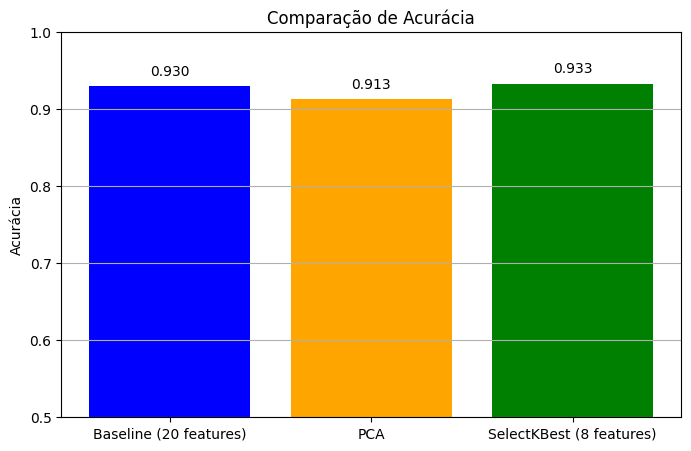

In [32]:
labels = ['Baseline (20 features)', 'PCA', 'SelectKBest (8 features)']
accuracies = [acc_full, acc_pca, acc_kbest]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, accuracies, color=['blue', 'orange', 'green'])
plt.title('Comparação de Acurácia')
plt.ylabel('Acurácia')
plt.ylim(0.5, 1.0)

# Adiciona valores nos topos das barras
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.3f}',
             ha='center', va='bottom')

plt.grid(axis='y')
plt.show()
